In [1]:
!pip install -q watermark

In [2]:
%load_ext watermark

%watermark -v -p cv2

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams
from google.colab.patches import cv2_imshow

%matplotlib inline

sns.set_style("white")
rcParams['figure.figsize'] = 12, 10

Shape: (600, 400, 3)
Data type: uint8
RGB Color Space


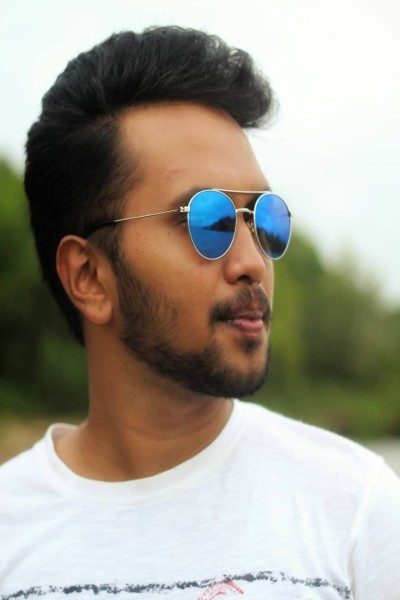

In [60]:
img = cv2.imread(filename = '/content/drive/MyDrive/Presets/VivekKini.jpg', flags = cv2.IMREAD_COLOR)
print('Shape:', img.shape)
print('Data type:', img.dtype)
print('RGB Color Space')
cv2_imshow(img)

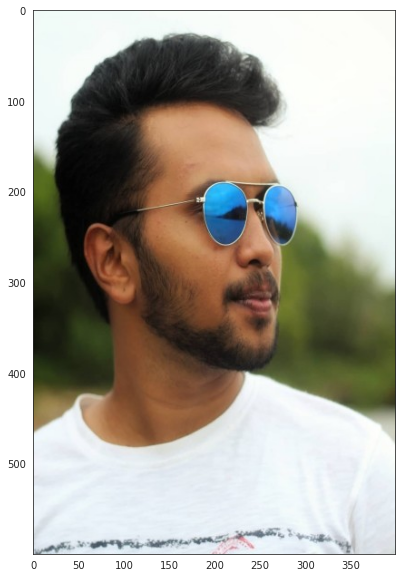

In [61]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

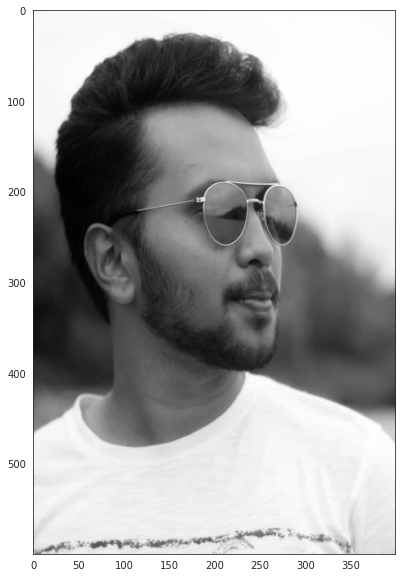

In [62]:
plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

In [71]:
def show_image(image, show_axis=True):
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  if not show_axis:
    plt.axis('off');

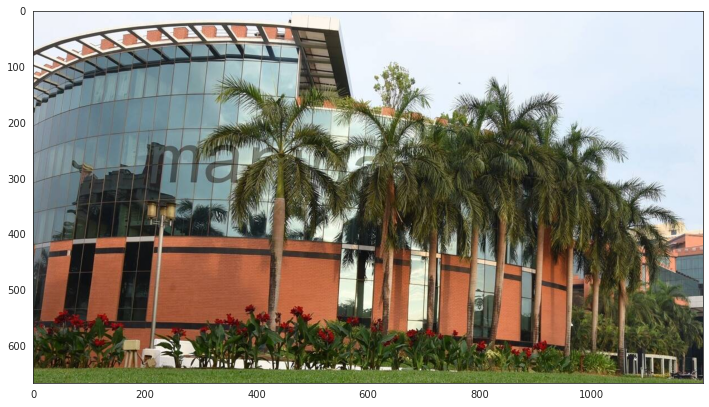

In [72]:
background = cv2.imread('/content/drive/MyDrive/Presets/manipal-edu.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w , h ))

show_image(background)

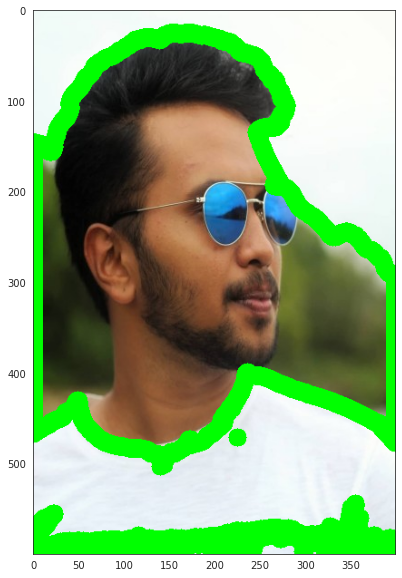

In [65]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = img.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

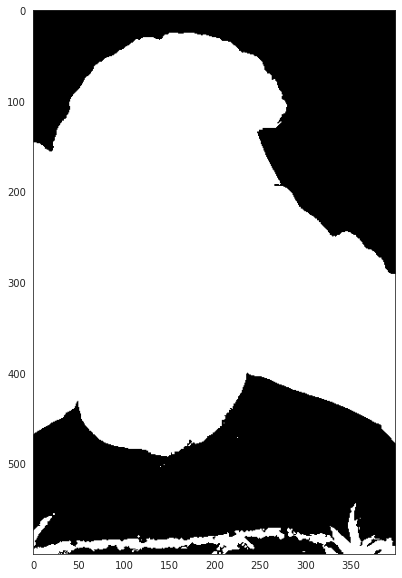

In [66]:
mask = np.zeros_like(img)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

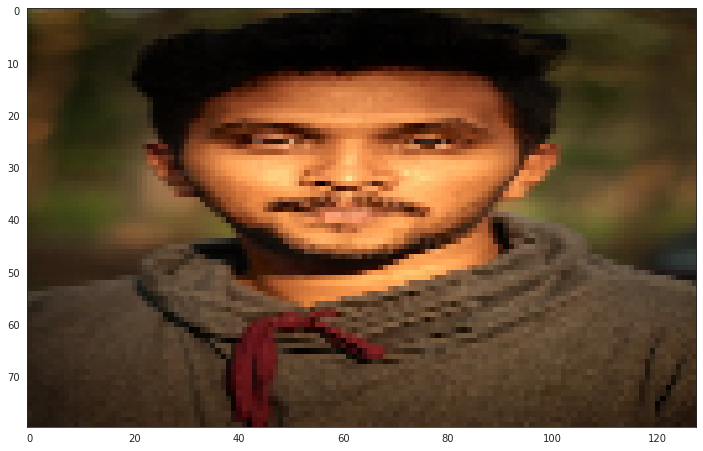

In [54]:
resize_width, resize_height = 128, 80

resized = cv2.resize(
  src = img, 
  dsize=(resize_width, resize_height), 
  interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

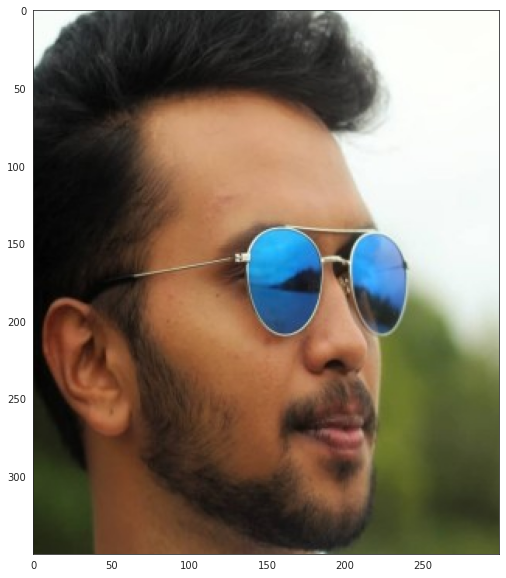

In [68]:
cropped = img[50:400, 50:350]

show_image(cropped)

In [69]:
m_m = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)

error: ignored

In [70]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
) # 0 = black, where ever their is black we ned to make it alpha i.e, GYM
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

error: ignored